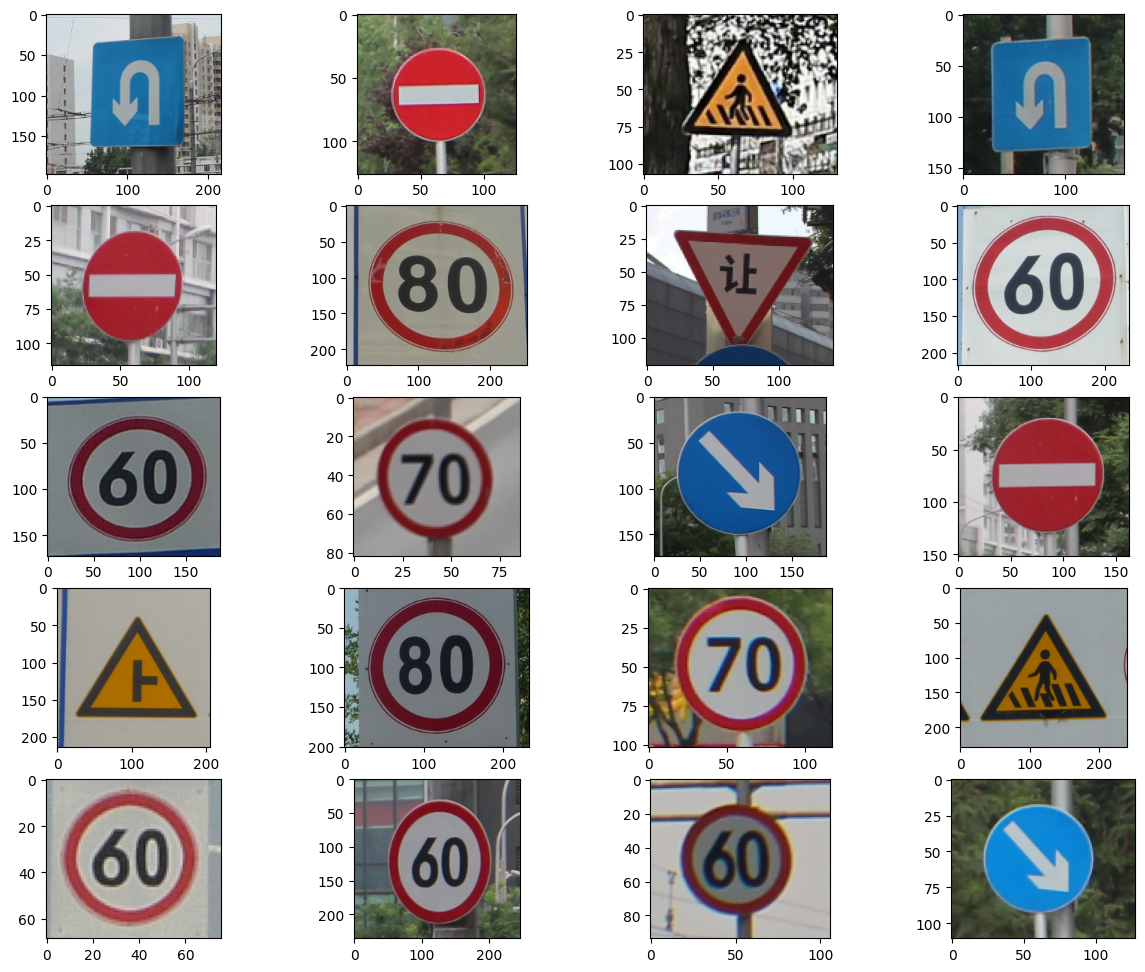

In [1]:
import matplotlib.pyplot as plt
import os
import numpy
import cv2 as cv
import numpy as np

files = np.random.choice(os.listdir("images/"), size=20, replace=False)
img_dir = "images/"

plt.figure(figsize=(15, 12))
for i, img_file in enumerate(files):
    img = cv.imread(img_dir + img_file)
    
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.subplot(5, 4, i+1)
    plt.imshow(img_rgb)
    
plt.show()

In [7]:
def preprocess_image(img, width, height, blur_ksize=(5, 5)):
    # Resize the image
    resized_img = cv.resize(img, (width, height))
    
    # Denoise the image using Gaussian blur
    denoised_img = cv.GaussianBlur(resized_img, blur_ksize, 0)
    
    # Convert to grayscale
    gray_img = cv.cvtColor(denoised_img, cv.COLOR_BGR2GRAY)
    
    # Convert grayscale to BGR to apply contrast enhancement
    gray_img_bgr = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)
    
    # Contrast enhancement
    img_lab = cv.cvtColor(gray_img_bgr, cv.COLOR_BGR2Lab)
    L, a, b = cv.split(img_lab)
    L = cv.equalizeHist(L)
    img_lab_merge = cv.merge((L, a, b))
    enhanced_img = cv.cvtColor(img_lab_merge, cv.COLOR_Lab2BGR)
    
    return enhanced_img

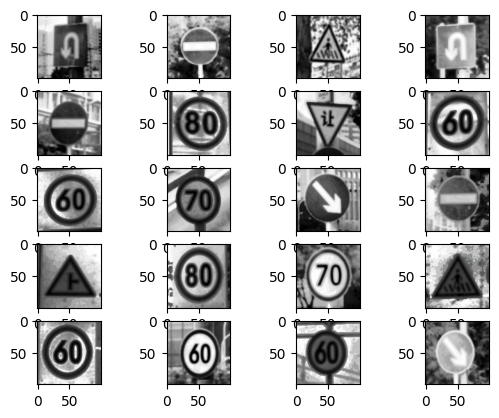

In [10]:
for i, img_file in enumerate(files):
    img = cv.imread(img_dir + img_file)
    
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_rgb =  preprocess_image(img,100,100)
    plt.subplot(5, 4, i+1)
    plt.imshow(img_rgb)